# Evaluation Project - 3

# HR Analytics Project- Understanding the Attrition in HR

**Problem Statement:**

Every year a lot of companies hire a number of employees. The companies invest time and money in training those employees, not just this but there are training programs within the companies for their existing employees as well. The aim of these programs is to increase the effectiveness of their employees. But where HR Analytics fit in this? and is it just about improving the performance of employees?

**HR Analytics**

Human resource analytics (HR analytics) is an area in the field of analytics that refers to applying analytic processes to the human resource department of an organization in the hope of improving employee performance and therefore getting a better return on investment. HR analytics does not just deal with gathering data on employee efficiency. Instead, it aims to provide insight into each process by gathering data and then using it to make relevant decisions about how to improve these processes.

**Attrition in HR**

Attrition in human resources refers to the gradual loss of employees overtime. In general, relatively high attrition is problematic for companies. HR professionals often assume a leadership role in designing company compensation programs, work culture, and motivation systems that help the organization retain top employees.

How does Attrition affect companies? and how does HR Analytics help in analyzing attrition? We will discuss the first question here and for the second question, we will write the code and try to understand the process step by step.

**Attrition affecting Companies**

A major problem in high employee attrition is its cost to an organization. Job postings, hiring processes, paperwork, and new hire training are some of the common expenses of losing employees and replacing them. Additionally, regular employee turnover prohibits your organization from increasing its collective knowledge base and experience over time. This is especially concerning if your business is customer-facing, as customers often prefer to interact with familiar people. Errors and issues are more likely if you constantly have new workers.

**Note: You can find the dataset in the link below.**

https://github.com/dsrscientist/IBM_HR_Attrition_Rate_Analytics

In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv('WA_Fn-UseC_-HR-Employee-Attrition.csv')

In [3]:
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [4]:
print("There are",df.shape[0],'observations in the given dataset which is covered using',df.shape[1],'columns.')

There are 1470 observations in the given dataset which is covered using 35 columns.


In [5]:
df.isnull().sum()   # Checking missing values in the dataset

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

**There is no null data in the given dataset. Great to go ahead!**

In [5]:
# Checking duplicates in the dataset

df.duplicated().sum()

0

**No duplicates present in the data and making our way smooth moving ahead**

In [6]:
df.columns   # Printing all the columns

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'EmployeeCount',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction',
       'MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'Over18', 'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')

**Columns:**

* **Age** - Age of the person


* **Attrition**  - gradual loss of employees overtime (Yes or No). This is our **target/label**.


* **Business Travel** - frequency of travel of person for work (Travel_Rarely, Travel_frequently and other)


* **Daily Rate** - the amount of money a company has to pay someone to work for them for a day


* **Department** - an area of special expertise or responsibility


* **Distance from Home** - distance brtween home and office


* **Education**  - educational programme or skills required for the profession


* **Education field** - Broad domain, branch or area of content covered by an educational programme


* **Employee count** - number of total employees a company has reported on it's annual filing.


* **Employee number** - unique number that has been assigned to each individual staff member within a company


* **Enviroment Satisfaction** - how a person feels with respect to the physical setting in question.


* **Gender** - sex (as a biological category) of a person


* **Hourly Rate** - the amount of money that is  paid for every hour worked


* **Job Involvement** -  the degree to which one identifies psychologically with one's work


* **Job Level** -  “job grades” or “classifications,” are categories with different titles and salary ranges within a workplace


* **Job Role** - part that an employee does in accordance with his or her key responsibility Areas.


* **Job Satisfaction** -  feeling of fulfilment or enjoyment that a person derives from their job.


* **Marital Status** - legally defined marital state (single, married, widowed, divorced, separated)


* **Monthly Income** - gross countable income received or projected to be received during the month


* **Monthly Rate** - fixed amount per month, assuming that they had no absences


* **NumCompaniesWorked** -Number of companies a person worked till date


* **Over18** - over age of majority 18


* **OverTime** - time worked in addition to one's normal working hours


* **Percent Salary Hike** - the increase in the current salary of any employee by a certain amount


* **Performance Rating** -  performance management systems to indicate an employee's level of performance or achievement


* **Relationship Satisfaction** - the subjective evaluation of one's relationship


* **Standard Hours** - the amount of work achievable, at the expected level of efficiency, in an hour.


* **Stock Option Level** - form of compensation. Companies can grant them to employees, contractors, consultants and investors


* **Total Working Years** - total number of years a person working (total professional experience)


* **Training Times LastYear** - number of trainings attended during lastyear


* **Work Life Balance** - the division of one's time and focus between working and family or leisure activities


* **Years At Company** - number of years a person working at current company


* **Years In Current Role** - number of years a person is in the current role


* **Years Since Last Promotion** - number of years since an employee's last promotion within the organization 


* **Years With Curr Manager** - number of years since a person is working under same manager



In [7]:
df.dtypes        # Checking datatypes of each column in the dataset

Age                          int64
Attrition                   object
BusinessTravel              object
DailyRate                    int64
Department                  object
DistanceFromHome             int64
Education                    int64
EducationField              object
EmployeeCount                int64
EmployeeNumber               int64
EnvironmentSatisfaction      int64
Gender                      object
HourlyRate                   int64
JobInvolvement               int64
JobLevel                     int64
JobRole                     object
JobSatisfaction              int64
MaritalStatus               object
MonthlyIncome                int64
MonthlyRate                  int64
NumCompaniesWorked           int64
Over18                      object
OverTime                    object
PercentSalaryHike            int64
PerformanceRating            int64
RelationshipSatisfaction     int64
StandardHours                int64
StockOptionLevel             int64
TotalWorkingYears   

* **Out of 35 columns, 9 features are of object datatype and rest is integer datatype**


* **Target variable - 'Attrition'**

In [8]:
df.describe().T     # Checking descriptive statistics of numerical variables

,count,mean,std,min,25%,50%,75%,max
Age,1470.0,36.923810,9.135373,18.0,30.00,36.0,43.00,60.0
DailyRate,1470.0,802.485714,403.509100,102.0,465.00,802.0,1157.00,1499.0
DistanceFromHome,1470.0,9.192517,8.106864,1.0,2.00,7.0,14.00,29.0
Education,1470.0,2.912925,1.024165,1.0,2.00,3.0,4.00,5.0
EmployeeCount,1470.0,1.000000,0.000000,1.0,1.00,1.0,1.00,1.0
EmployeeNumber,1470.0,1024.865306,602.024335,1.0,491.25,1020.5,1555.75,2068.0
EnvironmentSatisfaction,1470.0,2.721769,1.093082,1.0,2.00,3.0,4.00,4.0
HourlyRate,1470.0,65.891156,20.329428,30.0,48.00,66.0,83.75,100.0
JobInvolvement,1470.0,2.729932,0.711561,1.0,2.00,3.0,3.00,4.0
JobLevel,1470.0,2.063946,1.106940,1.0,1.00,2.0,3.00,5.0


* The minimum age of employee in the company is 18 and max age is 60.

* The mean distance from home is coming out as 9.19 km that means on average employee has to travel around 18 km fro home to office.

* 50% of Employees has worked atleast 2 companies previously.

* For Monthly Income,Monthly Rate by looking at 50% and max column we can say outliers exist in this feature.

* StandardHours and EmployeeCount contain same value for all stastical parameter. It means they contain one unique value.

* Among all numeric variables,'Education','EnvironmentSatisfaction','JobInvolvement', 'JobLevel', 'JobSatisfaction', RelationshipSatisfaction',  'PerformanceRating', 'WorkLifeBalance' are ordinal variable.

In [9]:
df['Education'].unique()

array([2, 1, 4, 3, 5], dtype=int64)

**Education: 1- 'Below College' , 2 -'College', 3 -'Graduate', 4- 'Post-Graduate' ,5 -'Phd'**

In [10]:
df['EnvironmentSatisfaction'].unique()

array([2, 3, 4, 1], dtype=int64)

**EnvironmentSatisfaction: 1- 'Low', 2- 'Medium', 3 -'High', 4- 'Very High'**

In [11]:
df['JobInvolvement'].unique()

array([3, 2, 4, 1], dtype=int64)

**JobInvolvement: 1 -'Low', 2- 'Medium', 3- 'High', 4- 'Very High'**

In [12]:
df['JobLevel'].unique()

array([2, 1, 3, 4, 5], dtype=int64)

**JobLevel: 1 -'Entry', 2- 'Intermediate', 3- 'Experienced', 4- 'Advanced', 5- 'Expert'**

In [13]:
df['JobSatisfaction'].unique()

array([4, 2, 3, 1], dtype=int64)

**JobSatisfaction: 1- 'Low', 2- 'Medium', 3- 'High', 4 -'Very High'**

In [13]:
df['RelationshipSatisfaction'].unique()

array([1, 4, 2, 3], dtype=int64)

**RelationshipSatisfaction: 1- 'Low', 2- 'Medium', 3- 'High', 4- 'Very High'**

In [14]:
df['PerformanceRating'].unique()

array([3, 4], dtype=int64)

**PerformanceRating: 1- 'Low', 2- 'Average', 3 -'Good', 4- 'Excellent', 5- 'Outstanding'**

In [15]:
df['WorkLifeBalance'].unique()

array([1, 3, 2, 4], dtype=int64)

**WorkLifeBalance: 1- 'Bad', 2- 'Good', 3- 'Better', 4- 'Best'**

In [16]:
# Checking the target variable

df['Attrition'].value_counts()

No     1233
Yes     237
Name: Attrition, dtype: int64

**Data seems imbalanced and need to make balanced data for model training**

# Data Analysis

In [17]:
# Importing required libraries

import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline
from collections import Counter
import plotly.graph_objs as go
import plotly.offline as py

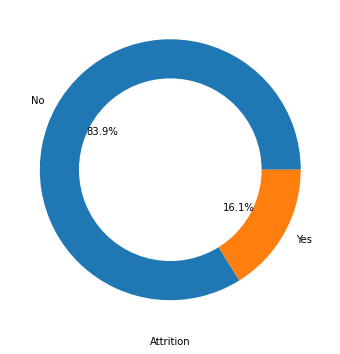

<Figure size 432x288 with 0 Axes>

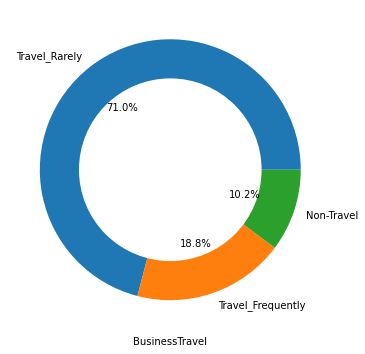

<Figure size 432x288 with 0 Axes>

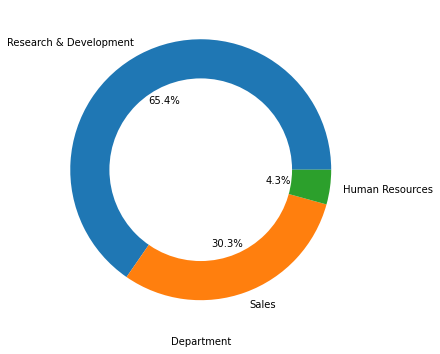

<Figure size 432x288 with 0 Axes>

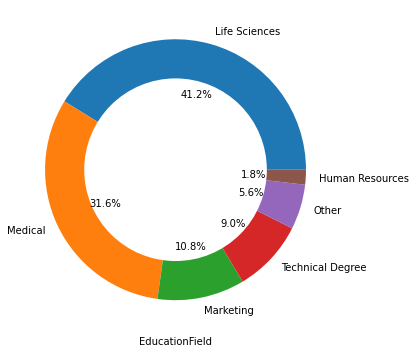

<Figure size 432x288 with 0 Axes>

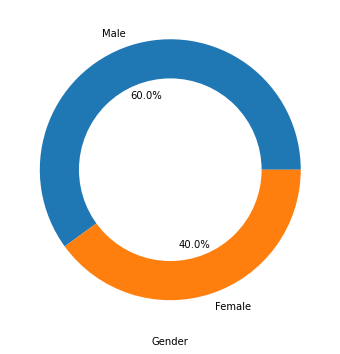

<Figure size 432x288 with 0 Axes>

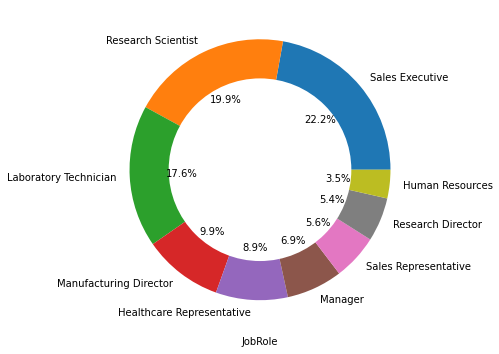

<Figure size 432x288 with 0 Axes>

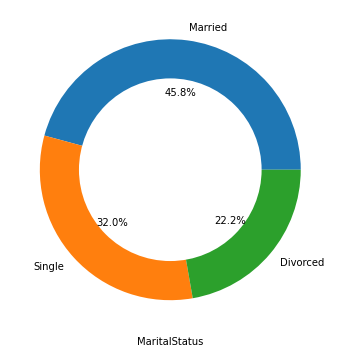

<Figure size 432x288 with 0 Axes>

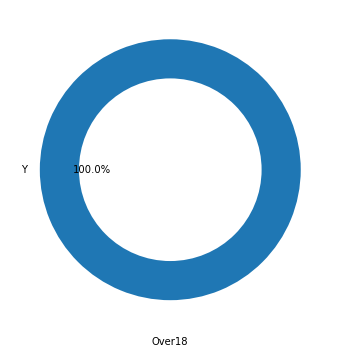

<Figure size 432x288 with 0 Axes>

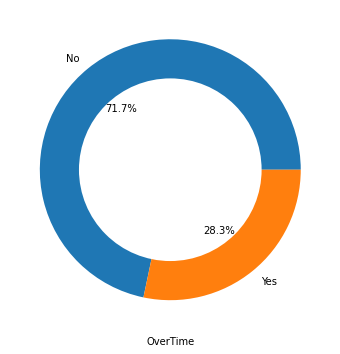

<Figure size 432x288 with 0 Axes>

In [18]:
catg = ['Attrition','BusinessTravel','Department','EducationField','Gender','JobRole','MaritalStatus','Over18','OverTime' ]
for i in catg:
    plt.figure(figsize=(10,6))
    df[i].value_counts().plot.pie(autopct='%1.1f%%')
    centre=plt.Circle((0,0),0.7,fc='white')
    fig=plt.gcf()
    fig.gca().add_artist(centre)
    plt.xlabel(i)
    plt.ylabel('')
    plt.figure()

* Around 83.9% of employees seems satisfied by their job and hence did not leave the company and 16.1% of employees left the company due to some reason or the other. But the dataset is imbalanced


* Around 18.8% of employees travel frequently for the work, 10% employees need to travel at all and rest travel rarely


* Around 65% of employee belongs to R & D department, 30% belongs to Sales department and rest belongs to HR dept.


* Seeing the educational field, it looks like this data belongs to some pharmaceutical company as around 72% of employees belongs to Life sciences and medical field.


* Out of total employees, 60% are Male and 40% are female.


* Around 46% of employees are married, 22% are divorced and rest are unmarried.


* Around 28% employees do overtime in the company.

In [19]:
# Checking the distribution of Department Vs education Field
pd.crosstab([df.Department],[df.EducationField], margins=True).style.background_gradient(cmap='Blues')

EducationField,Human Resources,Life Sciences,Marketing,Medical,Other,Technical Degree,All
Department,,,,,,,
Human Resources,27,16,0,13,3,4,63
Research & Development,0,440,0,363,64,94,961
Sales,0,150,159,88,15,34,446
All,27,606,159,464,82,132,1470


* Out of total 63 employee in **HR department**, only 27 belongs to HR field and more than half of the employee in HR dept does not have HR background. This may become one of the **reason of employee attrition** as they have different domain and working in department having no connection with the background.


* In **R&D department**, most of the employee comes from Life Science, Medical and technical background. Other factor like Salary Hike, travelling, overtime and Job level are need to taken into consideration while analysing Attrition of this category.


* Also, more than 50% employees in **Sales department** comes from Life Sciences and Medical background and might affect the **attrition rate** in this category.

In [20]:
# Checking attrition in department and also considering Job role

pd.crosstab([df.JobRole,df.Department],[df.Attrition], margins=True).style.background_gradient(cmap='Oranges')

* **High attrition** is seen in **R & D department** and then in Sales department.


* Job role like **Laboratory technician and Research Scientist** have high percentage of attrtion in R & D department.


* Out of total attrition, **Reserach Scientist** have around **20% attrition rate** which costs huge for a company because it not only loses employee but its knowledge base, expertise & Intellatual property rights in some cases.

In [21]:
# Analysing numerical variables

numeric = ['Age', 'DailyRate', 'DistanceFromHome','EnvironmentSatisfaction', 'HourlyRate', 'JobInvolvement', 'JobLevel',
           'JobSatisfaction','MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked', 'PercentSalaryHike', 'PerformanceRating', 
           'RelationshipSatisfaction','StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear','WorkLifeBalance',
           'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion', 'YearsWithCurrManager']

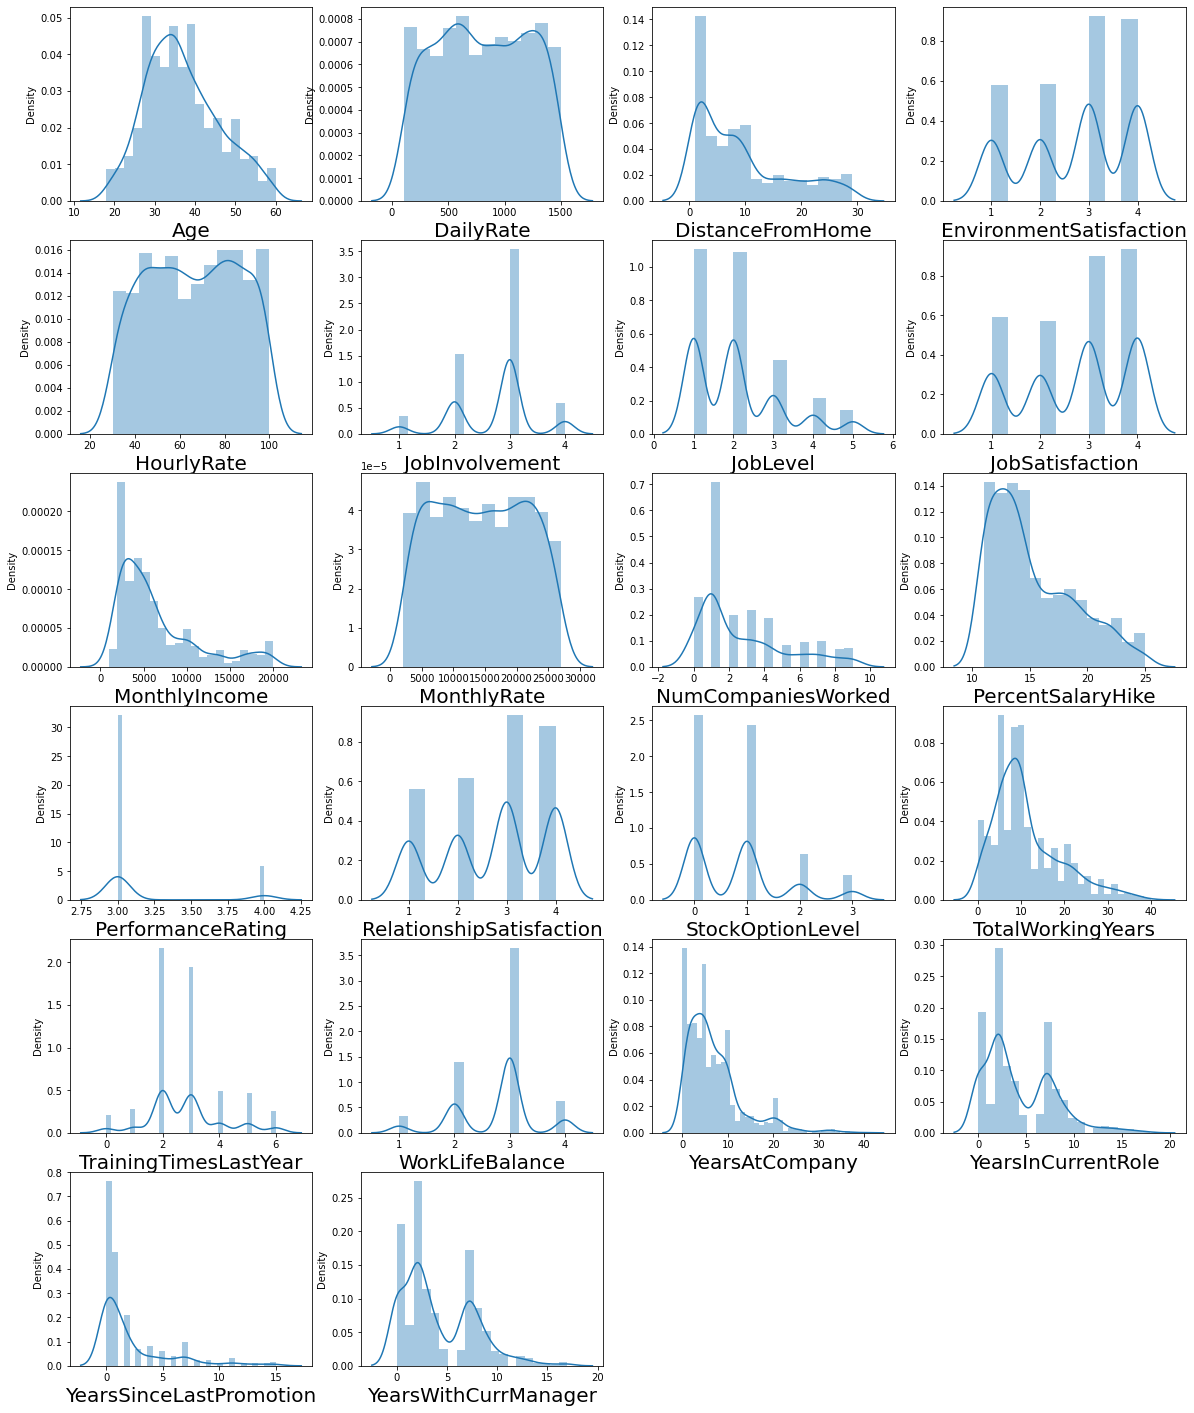

In [22]:
plt.figure(figsize=(20,25),facecolor='white')
plotnumber=1

for column in numeric:
    if plotnumber<=22:
        ax = plt.subplot(6,4,plotnumber)
        sns.distplot(df[column])
        plt.xlabel(column,fontsize=20)
    plotnumber+=1
plt.show()

The following columns have positive skewness in their data distribution:


* DistanceFromHome
* JobLevel
* MonthlyIncome
* NumCompaniesWorked
* PercentSalaryHike
* PerformanceRating
* StockOptionLevel
* TotalWorkingYears 
* TrainingTimesLastYear 
* WorkLifeBalance 
* YearsAtCompany              
* YearsInCurrentRole         
* YearsSinceLastPromotion     
* YearsWithCurrManager

In [23]:
# Checking skewness in magnitude
df.skew()

Age                         0.413286
DailyRate                  -0.003519
DistanceFromHome            0.958118
Education                  -0.289681
EmployeeCount               0.000000
EmployeeNumber              0.016574
EnvironmentSatisfaction    -0.321654
HourlyRate                 -0.032311
JobInvolvement             -0.498419
JobLevel                    1.025401
JobSatisfaction            -0.329672
MonthlyIncome               1.369817
MonthlyRate                 0.018578
NumCompaniesWorked          1.026471
PercentSalaryHike           0.821128
PerformanceRating           1.921883
RelationshipSatisfaction   -0.302828
StandardHours               0.000000
StockOptionLevel            0.968980
TotalWorkingYears           1.117172
TrainingTimesLastYear       0.553124
WorkLifeBalance            -0.552480
YearsAtCompany              1.764529
YearsInCurrentRole          0.917363
YearsSinceLastPromotion     1.984290
YearsWithCurrManager        0.833451
dtype: float64

**Optimal range of skewness is +/- 0.5**. The columns with more skewness needs to be reduced using transformation method.

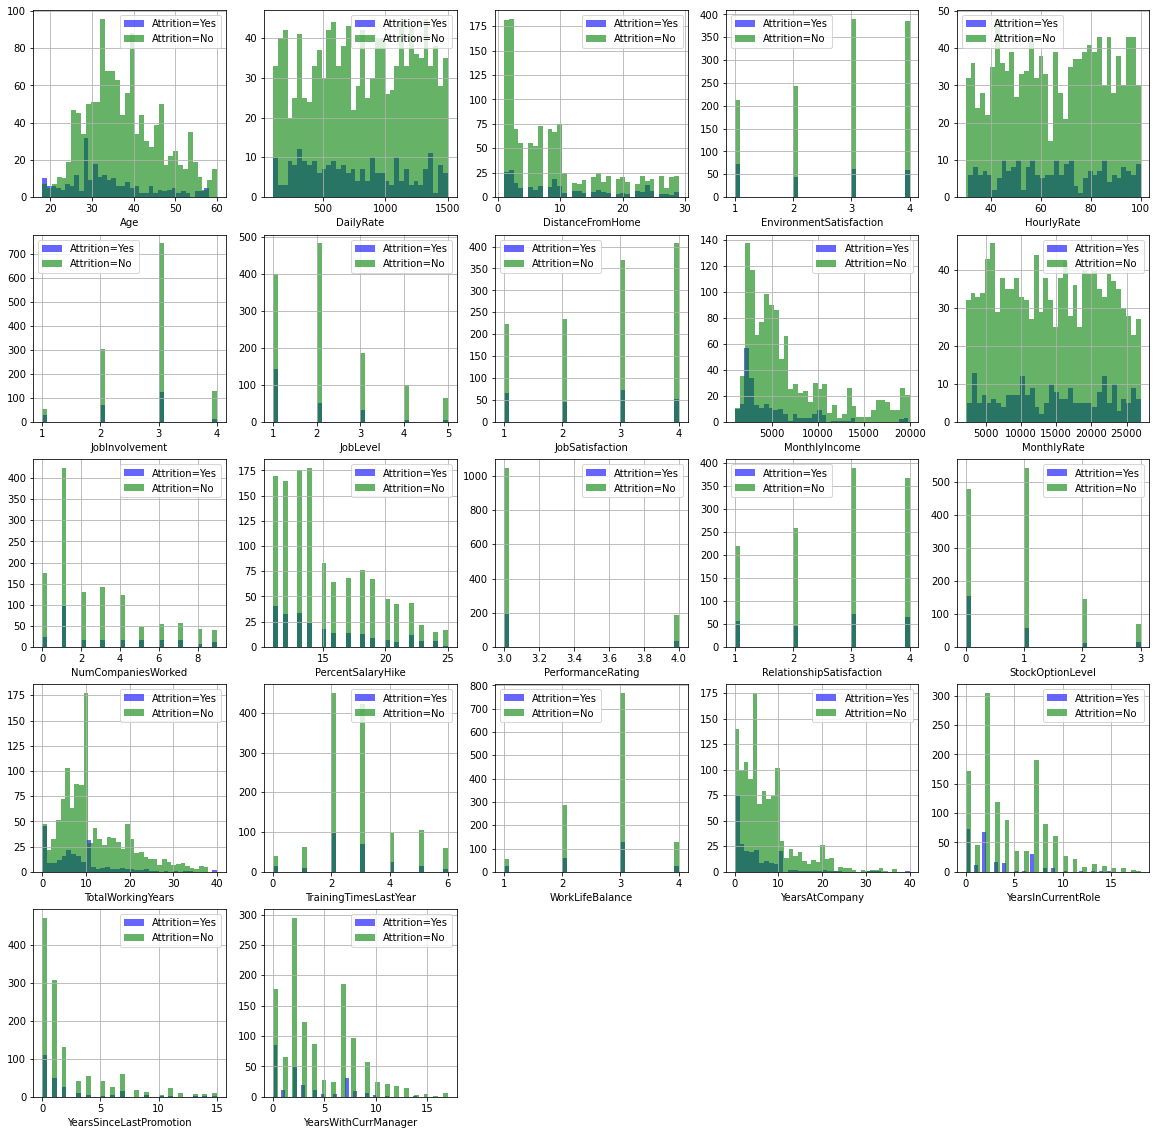

In [24]:
plt.figure(figsize=(20,20))
for i, column in enumerate(numeric,1):
    plt.subplot(5,5,i)
    df[df['Attrition']=='Yes'][column].hist(bins=36,color='blue',label="Attrition=Yes",alpha=0.6)
    df[df['Attrition']=='No'][column].hist(bins=36,color='green',label="Attrition=No",alpha=0.6)
    plt.xlabel(column)
    plt.legend()

**We can clearly see from the above plots, Environment satisfaction, Job satisfaction, Performance rating, Relationship satisfactions and Work Life Balance does not have much impact on the attrition of employees**

Text(0, 0.5, 'Number of Employees')

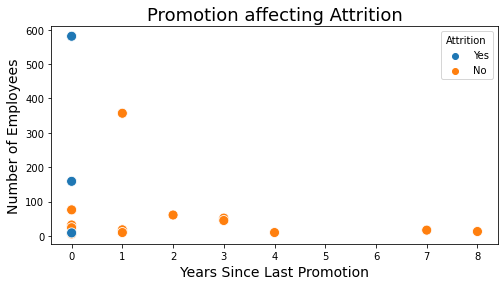

In [25]:
# How promotion affects attrition

plt.figure(figsize=(8,4))
prom_count_df=df['YearsSinceLastPromotion'].value_counts()
sns.scatterplot(df['YearsSinceLastPromotion'],prom_count_df,hue=df['Attrition'],s=100)
plt.title("Promotion affecting Attrition",fontsize=18)
plt.xlabel('Years Since Last Promotion',fontsize=14)
plt.ylabel('Number of Employees',fontsize=14)

**The above scatter plot shows that the employees who got promoted within a year left the company but the employees who are not promoted for long time are still in the same company**

<AxesSubplot:>

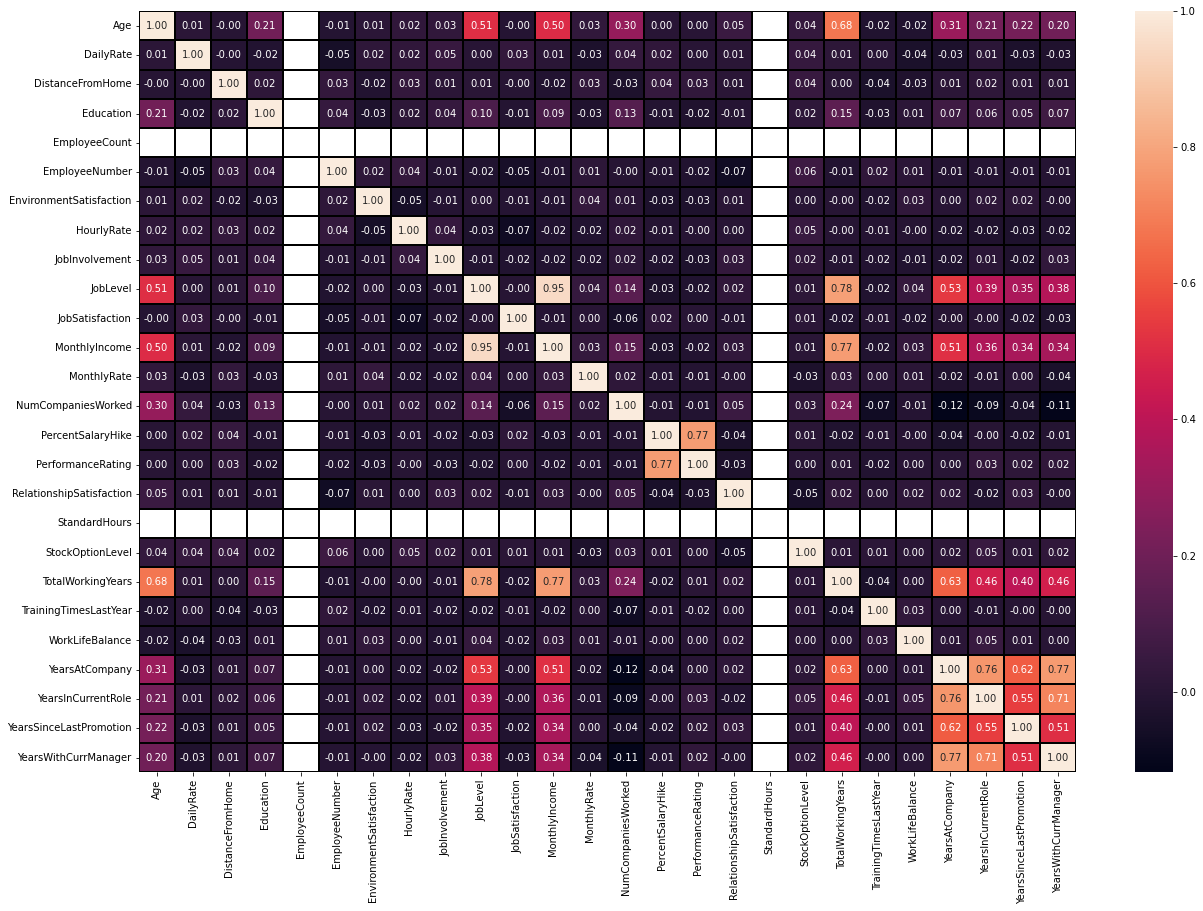

In [26]:
# Plotting heatmap and checking correlation

plt.figure(figsize=(21,14))
sns.heatmap(df.corr(),annot =True,linewidths=0.15,linecolor='black',fmt="0.2f")

**'Monthly Income' and 'Job Level' are strongly correlated. We will check multicollinearity going ahead**

In [27]:
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


# Encoding the categorical variable

In [28]:
from sklearn.preprocessing import LabelEncoder, OrdinalEncoder

le = LabelEncoder()

oe = OrdinalEncoder()

In [29]:
df['Attrition'] = le.fit_transform(df['Attrition'])

In [30]:
# Droping irrelevant columns
df.drop(["EmployeeCount", "EmployeeNumber", "Over18", "StandardHours"], axis=1, inplace=True)

In [31]:
for i in df.columns:
    if df[i].dtypes == "object":
        df[i] = oe.fit_transform(df[i].values.reshape(-1,1))

In [32]:
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,1,2.0,1102,2.0,1,2,1.0,2,0.0,...,3,1,0,8,0,1,6,4,0,5
1,49,0,1.0,279,1.0,8,1,1.0,3,1.0,...,4,4,1,10,3,3,10,7,1,7
2,37,1,2.0,1373,1.0,2,2,4.0,4,1.0,...,3,2,0,7,3,3,0,0,0,0
3,33,0,1.0,1392,1.0,3,4,1.0,4,0.0,...,3,3,0,8,3,3,8,7,3,0
4,27,0,2.0,591,1.0,2,1,3.0,1,1.0,...,3,4,1,6,3,3,2,2,2,2


# Outlier Detection and Removal

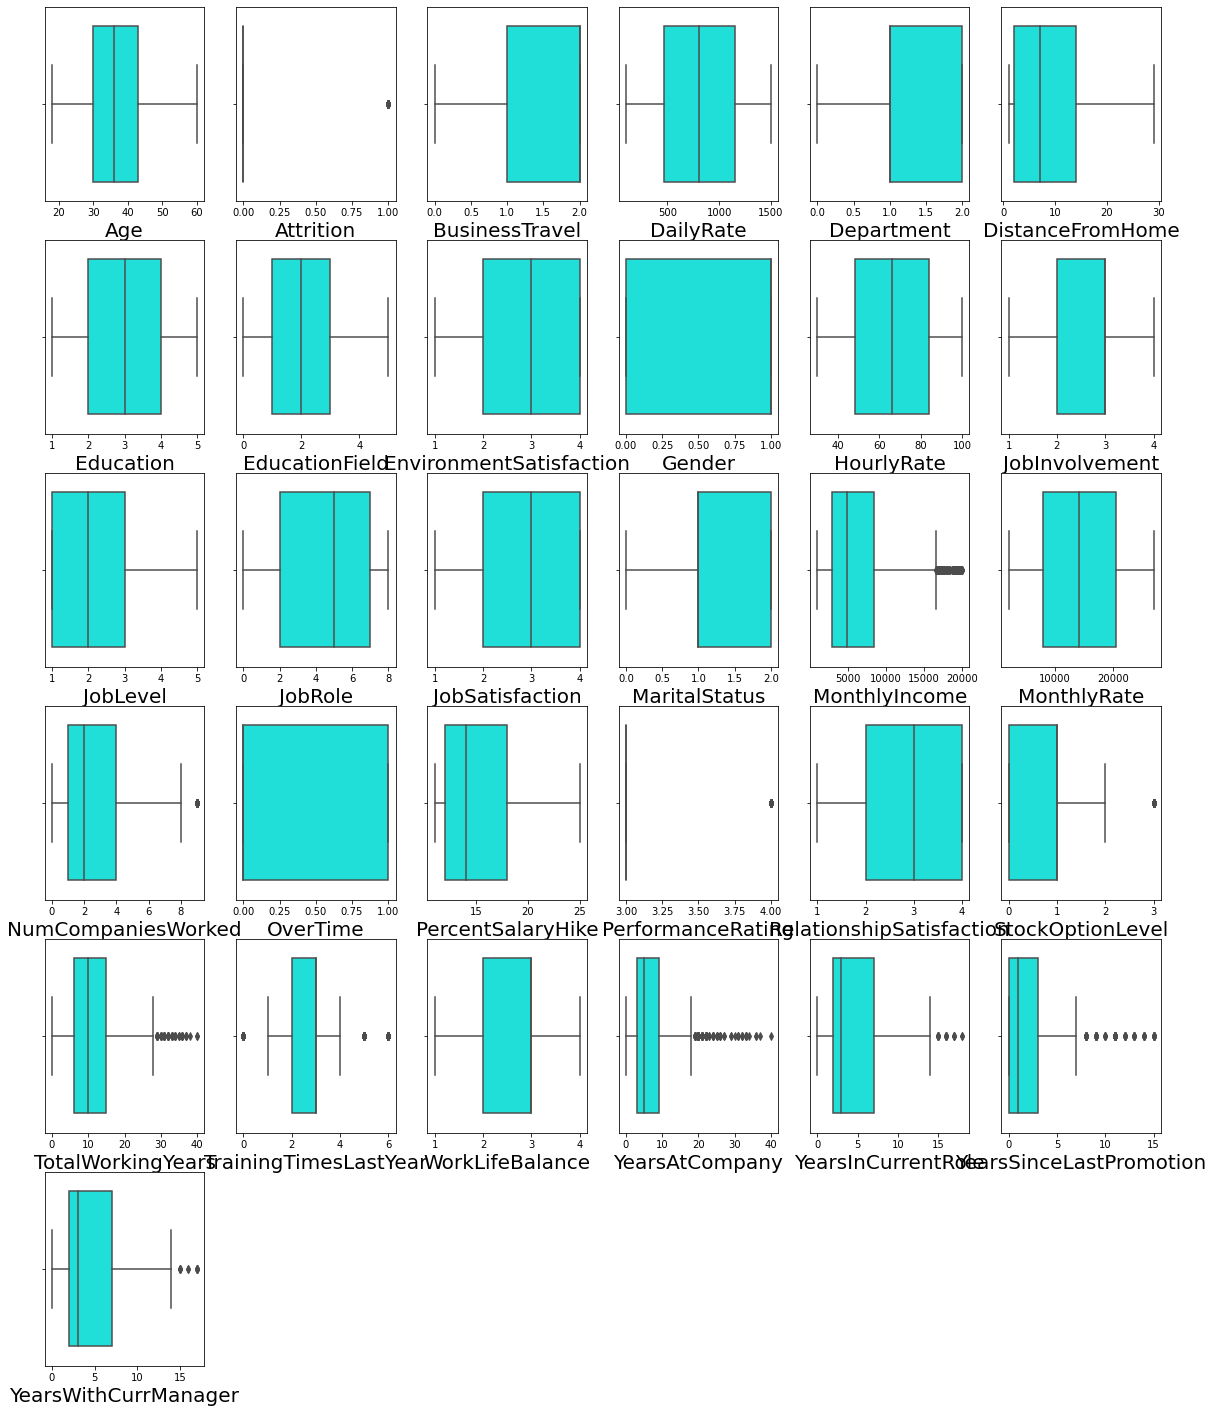

In [33]:
plt.figure(figsize=(20,25),facecolor='white')
plotnumber=1

for column in df:
    if plotnumber<=31:
        ax = plt.subplot(6,6,plotnumber)
        sns.boxplot(df[column], palette='hsv')
        plt.xlabel(column,fontsize=20)
    plotnumber+=1
plt.show()

In [34]:
df.shape

(1470, 31)

In [35]:
# Removing outliers using zscore and keeping threshold as 3 (3 std from mean : 99.7% of data included)

from scipy.stats import zscore

z_score = np.abs(zscore(df))

filtering_entry = (z_score < 3).all(axis = 1)

df_new = df[filtering_entry]

In [36]:
df_new.shape

(1387, 31)

In [37]:
print("Data loss in % : ",(1470-1387)/1470*100)

Data loss in % :  5.646258503401361


# Considering skewness reduction

In [38]:
# Considering skewness reduction through PowerTransformer

from sklearn.preprocessing import PowerTransformer

pt = PowerTransformer()

In [39]:
# Seperating features and target variable

X = df_new.drop('Attrition',axis=1)

y = df_new['Attrition']

In [40]:
X_new_pt = pt.fit_transform(X)

# Converting numpy array(X_new_pt) into Dataframe and reassigning the values

X = pd.DataFrame(X_new_pt,columns= X.columns)

# Checking Skewness

X.skew().sort_values(ascending=False)

OverTime                    0.954751
YearsSinceLastPromotion     0.212301
PercentSalaryHike           0.112128
JobLevel                    0.110769
StockOptionLevel            0.089929
TrainingTimesLastYear       0.057949
MonthlyIncome               0.027700
NumCompaniesWorked          0.016175
Department                  0.015095
PerformanceRating           0.000000
Age                        -0.004079
DistanceFromHome           -0.008149
EducationField             -0.008642
TotalWorkingYears          -0.009666
WorkLifeBalance            -0.011133
JobInvolvement             -0.018801
YearsAtCompany             -0.025230
YearsInCurrentRole         -0.069631
YearsWithCurrManager       -0.070570
Education                  -0.103747
HourlyRate                 -0.105678
MaritalStatus              -0.158253
MonthlyRate                -0.176560
RelationshipSatisfaction   -0.191406
DailyRate                  -0.199742
EnvironmentSatisfaction    -0.205472
JobSatisfaction            -0.217730
J

**Skewness of al the columns are within the limit**

For Categorical variables like 'BusinessTravel' and 'Overtime', skew parameter is irrelevant

# Checking Multicollinearity using variance inflation factor

In [41]:
# Checking multicollinearity in the dataset
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame()
vif['vif'] = [variance_inflation_factor(X.values,i) for i in range(X.shape[1])]
vif['Features'] = X.columns

vif

,vif,Features
0,1.930457,Age
1,1.014314,BusinessTravel
2,1.025841,DailyRate
3,2.172093,Department
4,1.017385,DistanceFromHome
5,1.065266,Education
6,1.030480,EducationField
7,1.024396,EnvironmentSatisfaction
8,1.024366,Gender
9,1.024189,HourlyRate


**Multicollinearity is within the permissible limit of 10. Hence Good to go ahead**

# Balancing target variable using SMOTE

In [42]:
from imblearn.over_sampling import SMOTE

over_smp = SMOTE(0.8)

In [43]:
X,y = over_smp.fit_resample(X,y)

In [44]:
print("The number of target classes after fit{}".format(Counter(y)))

The number of target classes after fitCounter({0: 1158, 1: 926})


# Scaling using Standard Scaler

In [45]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_scaler = scaler.fit_transform(X)

# Model Building

In [46]:
# Importing required libraries

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score,classification_report, confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.metrics import plot_roc_curve
from sklearn.ensemble import AdaBoostClassifier,GradientBoostingClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score

# Function for calculating Model performance

In [47]:
# Defining function for calculating the performance of the classification model

def metric_score(clf,X_train,X_test,y_train,y_test,train = True):
    if train:
        y_pred = clf.predict(X_train)
        
        print("-----------------Train Result--------------------")
        
        print(f"Train Accuracy Score : {accuracy_score(y_train,y_pred)*100:.2f}%")
        
    elif train == False:
        
        pred = clf.predict(X_test)
        
        matrix = confusion_matrix(y_test,pred)
        
        print("-----------------Test Result--------------------")
        
        print("=====Confusion Matrix======= \n",matrix)
        
        print(f"Test Accuracy Score : {accuracy_score(y_test,pred)*100:.2f}%")
        
        print("\n Test Classification Report \n ", classification_report(y_test,pred,digits =2))

# Best Random State

In [48]:
maxAccu = 0 # Max Accuracy
maxRS = 0   # Best random state for which maximum accuracy is achieved

for i in range(0,100):
    X_train,X_test,y_train,y_test = train_test_split(X_scaler,y,test_size=0.2,random_state=i)
  
    rf = RandomForestClassifier()
    
    rf.fit(X_train,y_train)    # Training the model
   
    pred_rf = rf.predict(X_test)    # Predicting the target variable
 
    acc_rf = accuracy_score(y_test,pred_rf)
  
    if acc_rf>maxAccu:
    
        maxAccu = acc_rf
        
        maxRS = i
        
print("Maximum Accuracy:",maxAccu,"at random state ", maxRS)

Maximum Accuracy: 0.9568345323741008 at random state  80


**Best Random state - 80 having maximum  accuracy as 95.68%**

# Train test split 

In [49]:
X_train,X_test,y_train,y_test = train_test_split(X_scaler,y,test_size=0.2,random_state=80)

# Random Forest

In [50]:
rf = RandomForestClassifier()

rf.fit(X_train,y_train)      # Model training

pred_rf = rf.predict(X_test)    # Predicted values

metric_score(rf,X_train,X_test,y_train,y_test,train=True)  # Training result

metric_score(rf,X_train,X_test,y_train,y_test,train=False)  # Test result

cr_rf = cross_val_score(rf,X_scaler,y,cv=5)

print("Cross validation score of Random Forest Classifier model :",cr_rf.mean()*100)

-----------------Train Result--------------------
Train Accuracy Score : 100.00%
-----------------Test Result--------------------
=====Confusion Matrix======= 
 [[233   4]
 [ 13 167]]
Test Accuracy Score : 95.92%

 Test Classification Report 
                precision    recall  f1-score   support

           0       0.95      0.98      0.96       237
           1       0.98      0.93      0.95       180

    accuracy                           0.96       417
   macro avg       0.96      0.96      0.96       417
weighted avg       0.96      0.96      0.96       417

Cross validation score of Random Forest Classifier model : 92.75652554879174


# Hyperparameter Tuning - Random Forest

In [51]:
from sklearn.model_selection import GridSearchCV

params_rf = {'criterion':['gini','entropy'],
         'max_depth': [12,14,16,18],
         'min_samples_split' :[2,3,4],
         'min_samples_leaf' :[1,2,3]}

In [52]:
grd_rf = GridSearchCV(rf,param_grid = params_rf,n_jobs =-1)

grd_rf.fit(X_train,y_train)

print("Best parameters : ",grd_rf.best_params_)

Best parameters :  {'criterion': 'entropy', 'max_depth': 14, 'min_samples_leaf': 1, 'min_samples_split': 2}


In [53]:
rf = grd_rf.best_estimator_

rf.fit(X_train,y_train)

pred_rf = rf.predict(X_test)    # Predicted values

metric_score(rf,X_train,X_test,y_train,y_test,train=True)  # Training result

metric_score(rf,X_train,X_test,y_train,y_test,train=False)  # Test result

cr_rf = cross_val_score(rf,X_scaler,y,cv=5)

print("Cross validation score of Random Forest Classifier model :",cr_rf.mean()*100)

-----------------Train Result--------------------
Train Accuracy Score : 100.00%
-----------------Test Result--------------------
=====Confusion Matrix======= 
 [[233   4]
 [ 17 163]]
Test Accuracy Score : 94.96%

 Test Classification Report 
                precision    recall  f1-score   support

           0       0.93      0.98      0.96       237
           1       0.98      0.91      0.94       180

    accuracy                           0.95       417
   macro avg       0.95      0.94      0.95       417
weighted avg       0.95      0.95      0.95       417

Cross validation score of Random Forest Classifier model : 92.75687142593618


# Logistic Regression

In [54]:
lr = LogisticRegression()

lr.fit(X_train,y_train)      # Model training

pred_lr = lr.predict(X_test)    # Predicted values

metric_score(lr,X_train,X_test,y_train,y_test,train=True)  # Training result

metric_score(lr,X_train,X_test,y_train,y_test,train=False)  # Test result

cr_lr = cross_val_score(lr,X_scaler,y,cv=5)

print("Cross validation score of Logistic Regression model :",cr_lr.mean()*100)

-----------------Train Result--------------------
Train Accuracy Score : 80.32%
-----------------Test Result--------------------
=====Confusion Matrix======= 
 [[198  39]
 [ 33 147]]
Test Accuracy Score : 82.73%

 Test Classification Report 
                precision    recall  f1-score   support

           0       0.86      0.84      0.85       237
           1       0.79      0.82      0.80       180

    accuracy                           0.83       417
   macro avg       0.82      0.83      0.82       417
weighted avg       0.83      0.83      0.83       417

Cross validation score of Logistic Regression model : 80.51870042427596


# HPT - Logistic Regression

In [55]:
lr_params = {'penalty':['l1', 'l2'],
             'tol':[0.0001,0.001,0.01],
             'solver':['newton-cg', 'lbfgs', 'liblinear'],
             'multi_class':['auto', 'ovr', 'multinomial']}

In [56]:
grd_lr = GridSearchCV(lr,param_grid = lr_params, n_jobs =-1)

grd_lr.fit(X_train,y_train)

print("Best parameters : ",grd_lr.best_params_)

Best parameters :  {'multi_class': 'ovr', 'penalty': 'l1', 'solver': 'liblinear', 'tol': 0.01}


In [57]:
lr = grd_lr.best_estimator_

lr.fit(X_train,y_train)

pred_lr = lr.predict(X_test)    # Predicted values

metric_score(lr,X_train,X_test,y_train,y_test,train=True)

metric_score(lr,X_train,X_test,y_train,y_test,train=False)

cr_lr = cross_val_score(lr,X_scaler,y,cv=5)

print("Cross validation score of Logistic regression model :",cr_lr.mean()*100)

-----------------Train Result--------------------
Train Accuracy Score : 79.96%
-----------------Test Result--------------------
=====Confusion Matrix======= 
 [[198  39]
 [ 32 148]]
Test Accuracy Score : 82.97%

 Test Classification Report 
                precision    recall  f1-score   support

           0       0.86      0.84      0.85       237
           1       0.79      0.82      0.81       180

    accuracy                           0.83       417
   macro avg       0.83      0.83      0.83       417
weighted avg       0.83      0.83      0.83       417

Cross validation score of Logistic regression model : 80.51870042427596


# KNN Classifier

In [58]:
knn = KNeighborsClassifier()

knn.fit(X_train,y_train)      # Model training

pred_knn = knn.predict(X_test)    # Predicted values

metric_score(knn,X_train,X_test,y_train,y_test,train=True)  # Training result

metric_score(knn,X_train,X_test,y_train,y_test,train=False)  # Test result

cr_knn = cross_val_score(knn,X_scaler,y,cv=5)

print("Cross validation score of K Neighbors Classifier model :",cr_knn.mean()*100)

-----------------Train Result--------------------
Train Accuracy Score : 85.96%
-----------------Test Result--------------------
=====Confusion Matrix======= 
 [[155  82]
 [  4 176]]
Test Accuracy Score : 79.38%

 Test Classification Report 
                precision    recall  f1-score   support

           0       0.97      0.65      0.78       237
           1       0.68      0.98      0.80       180

    accuracy                           0.79       417
   macro avg       0.83      0.82      0.79       417
weighted avg       0.85      0.79      0.79       417

Cross validation score of K Neighbors Classifier model : 80.56654676258994


# Tuning - KNN

In [59]:
knn_params = { 'n_neighbors':[4,5,6,7],
        'weights':['uniform','distance'],
    'algorithm':['auto','ball_tree','kd_tree','brute'],
    'leaf_size':[25,30,35]}

In [60]:
grd_knn = GridSearchCV(knn,param_grid = knn_params,cv = 5, n_jobs =-1)

grd_knn.fit(X_train,y_train)

print("Best parameters : ",grd_knn.best_params_)

Best parameters :  {'algorithm': 'auto', 'leaf_size': 25, 'n_neighbors': 4, 'weights': 'uniform'}


In [61]:
knn = grd_knn.best_estimator_

knn.fit(X_train,y_train)      # Model training

pred_knn = knn.predict(X_test)    # Predicted values

metric_score(knn,X_train,X_test,y_train,y_test,train=True)  # Training result

metric_score(knn,X_train,X_test,y_train,y_test,train=False)  # Test result

cr_knn = cross_val_score(knn,X_scaler,y,cv=5)

print("Cross validation score of K Neighbors Classifier model :",cr_knn.mean()*100)

-----------------Train Result--------------------
Train Accuracy Score : 91.90%
-----------------Test Result--------------------
=====Confusion Matrix======= 
 [[172  65]
 [  6 174]]
Test Accuracy Score : 82.97%

 Test Classification Report 
                precision    recall  f1-score   support

           0       0.97      0.73      0.83       237
           1       0.73      0.97      0.83       180

    accuracy                           0.83       417
   macro avg       0.85      0.85      0.83       417
weighted avg       0.86      0.83      0.83       417

Cross validation score of K Neighbors Classifier model : 85.55640103301974


# Decision Tree Classifier

In [62]:
dt = DecisionTreeClassifier()

dt.fit(X_train,y_train)      # Model training

pred_dt = dt.predict(X_test)    # Predicted values

metric_score(dt,X_train,X_test,y_train,y_test,train=True)  # Training result

metric_score(dt,X_train,X_test,y_train,y_test,train=False)  # Test result

cr_dt = cross_val_score(dt,X_scaler,y,cv=5)

print("Cross validation score of Decision Tree Classifier model :",cr_dt.mean()*100)

-----------------Train Result--------------------
Train Accuracy Score : 100.00%
-----------------Test Result--------------------
=====Confusion Matrix======= 
 [[191  46]
 [ 26 154]]
Test Accuracy Score : 82.73%

 Test Classification Report 
                precision    recall  f1-score   support

           0       0.88      0.81      0.84       237
           1       0.77      0.86      0.81       180

    accuracy                           0.83       417
   macro avg       0.83      0.83      0.83       417
weighted avg       0.83      0.83      0.83       417

Cross validation score of Decision Tree Classifier model : 83.30335731414868


# Tuning - Decision Tree

In [63]:
grid_param = {'max_depth': range(15,20),
              'min_samples_leaf': range(8,14),
              'min_samples_split': range(2,6),
              'max_leaf_nodes': range(40,50)
             }

In [64]:
grid_search = GridSearchCV(estimator = dt, param_grid = grid_param,n_jobs =-1)

grid_search.fit(X_train,y_train)

print("Best parameters : ",grid_search.best_params_)

Best parameters :  {'max_depth': 15, 'max_leaf_nodes': 46, 'min_samples_leaf': 10, 'min_samples_split': 2}


In [65]:
dt = grid_search.best_estimator_

dt.fit(X_train,y_train)      # Model training

pred_dt = dt.predict(X_test)    # Predicted values

metric_score(dt,X_train,X_test,y_train,y_test,train=True)  # Training result

metric_score(dt,X_train,X_test,y_train,y_test,train=False)  # Test result

cr_dt = cross_val_score(dt,X_scaler,y,cv=5)

print("Cross validation score of Decision Tree Classifier model :",cr_dt.mean()*100)

-----------------Train Result--------------------
Train Accuracy Score : 89.98%
-----------------Test Result--------------------
=====Confusion Matrix======= 
 [[197  40]
 [ 35 145]]
Test Accuracy Score : 82.01%

 Test Classification Report 
                precision    recall  f1-score   support

           0       0.85      0.83      0.84       237
           1       0.78      0.81      0.79       180

    accuracy                           0.82       417
   macro avg       0.82      0.82      0.82       417
weighted avg       0.82      0.82      0.82       417

Cross validation score of Decision Tree Classifier model : 82.15181700793212


# Support Vector Classifier

In [66]:
svc = SVC()

svc.fit(X_train,y_train)      # Model training

pred_svc = svc.predict(X_test)    # Predicted values

metric_score(svc,X_train,X_test,y_train,y_test,train=True)  # Training result

metric_score(svc,X_train,X_test,y_train,y_test,train=False)  # Test result

cr_svc = cross_val_score(svc,X_scaler,y,cv=5)

print("Cross validation score of Support Vector Classifier model :",cr_svc.mean()*100)

-----------------Train Result--------------------
Train Accuracy Score : 95.98%
-----------------Test Result--------------------
=====Confusion Matrix======= 
 [[215  22]
 [ 12 168]]
Test Accuracy Score : 91.85%

 Test Classification Report 
                precision    recall  f1-score   support

           0       0.95      0.91      0.93       237
           1       0.88      0.93      0.91       180

    accuracy                           0.92       417
   macro avg       0.92      0.92      0.92       417
weighted avg       0.92      0.92      0.92       417

Cross validation score of Support Vector Classifier model : 90.78779284264895


In [67]:
svc_params = {'kernel':['rbf','linear','poly','sigmoid'],
              'gamma':['scale','auto'],
              'decision_function_shape':['ovr','ovo']
              }

In [68]:
grd_svc = GridSearchCV(svc,param_grid = svc_params,n_jobs =-1)

grd_svc.fit(X_train,y_train)

print("Best parameters : ",grd_svc.best_params_)

Best parameters :  {'decision_function_shape': 'ovr', 'gamma': 'scale', 'kernel': 'rbf'}


In [69]:
svc = grd_svc.best_estimator_

svc.fit(X_train,y_train)      # Model training

pred_svc = svc.predict(X_test)    # Predicted values

metric_score(svc,X_train,X_test,y_train,y_test,train=True)  # Training result

metric_score(svc,X_train,X_test,y_train,y_test,train=False)  # Test result

cr_svc = cross_val_score(svc,X_scaler,y,cv=5)

print("Cross validation score of Support Vector Classifier model :",cr_svc.mean()*100)

-----------------Train Result--------------------
Train Accuracy Score : 95.98%
-----------------Test Result--------------------
=====Confusion Matrix======= 
 [[215  22]
 [ 12 168]]
Test Accuracy Score : 91.85%

 Test Classification Report 
                precision    recall  f1-score   support

           0       0.95      0.91      0.93       237
           1       0.88      0.93      0.91       180

    accuracy                           0.92       417
   macro avg       0.92      0.92      0.92       417
weighted avg       0.92      0.92      0.92       417

Cross validation score of Support Vector Classifier model : 90.78779284264895


# Plotting ROC AUC curve to choose best model

In [70]:
from sklearn.metrics import plot_roc_curve

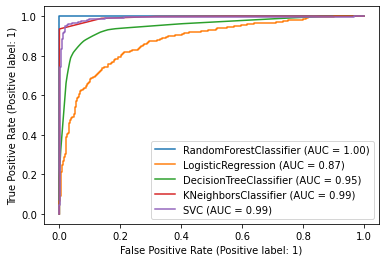

In [71]:
# Plotting ROC AUC curve on training data

disp = plot_roc_curve(rf,X_train,y_train)

plot_roc_curve(lr,X_train,y_train,ax=disp.ax_)

plot_roc_curve(dt,X_train,y_train,ax=disp.ax_)

plot_roc_curve(knn,X_train,y_train,ax=disp.ax_)

plot_roc_curve(svc,X_train,y_train,ax=disp.ax_)

plt.legend(prop={'size':10},loc='lower right')

plt.show()

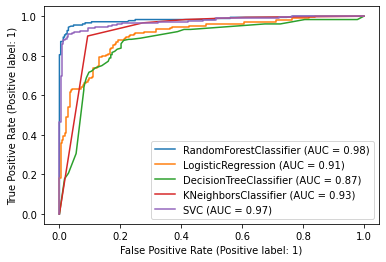

In [72]:
# Plotting ROC AUC curve on test data

disp = plot_roc_curve(rf,X_test,y_test)

plot_roc_curve(lr,X_test,y_test,ax=disp.ax_)

plot_roc_curve(dt,X_test,y_test,ax=disp.ax_)

plot_roc_curve(knn,X_test,y_test,ax=disp.ax_)

plot_roc_curve(svc,X_test,y_test,ax=disp.ax_)

plt.legend(prop={'size':10},loc='lower right')

plt.show()

**Best model as per ROC AUC Curve:** - **Random Forest Classifier** as the difference between training and test accuracy is minimum and also more area is covered under Random Forest curve



# Saving the model in pickle format

In [73]:
import pickle

In [74]:
filename = 'HR_analytics_attrition.pkl'
pickle.dump(rf,open(filename,'wb'))

# Conclusion

In [75]:
loaded_model = pickle.load(open('HR_analytics_attrition.pkl','rb'))

pred_rf = loaded_model.predict(X_test)

result = accuracy_score(y_test,pred_rf)

print(result*100)

94.96402877697841


In [76]:
conclusion = pd.DataFrame([pred_rf,y_test],index=['Predicted','Original'])

conclusion

,0,1,2,3,4,5,6,7,8,9,...,407,408,409,410,411,412,413,414,415,416
Predicted,0,0,1,0,0,0,0,0,0,1,...,0,1,1,1,0,1,0,1,0,0
Original,0,0,1,0,0,0,0,0,0,1,...,0,1,1,1,0,1,0,1,0,0
